In [54]:
location = "/mnt/c/Users/Saurav Baral/Desktop/20.RERConverge_trimmed/unTrimmed/3.For_tree"
import pandas as pd

csv_file = pd.read_csv(f"{location}/ERC_correlation.csv")
print(csv_file)
# with open(f"{location}/ERC_correlation.csv", 'r') as cor_file:
#     for line in cor_file.readlines():
#         for i,item in enumerate(line.split(",")):
#             # print(i,item)
#             if "_nostop.fas.aligned.fas.best" not in item:
#                 print(i,item)
#         assert False

      7783at7088_nostop.fas.aligned.fas.best  \
0                                        NaN   
1                                   0.191537   
2                                   0.140312   
3                                   0.143900   
4                                   0.218668   
...                                      ...   
4566                                0.070175   
4567                                0.335184   
4568                                0.393151   
4569                                0.101578   
4570                                0.060870   

      2966at7088_nostop.fas.aligned.fas.best  \
0                                   0.191537   
1                                   1.000000   
2                                   0.071983   
3                                   0.247835   
4                                   0.287102   
...                                      ...   
4566                                0.269003   
4567                                0.1

In [55]:
csv_file.index = csv_file.columns
string_to_remove = "_nostop.fas.aligned.fas.best"
csv_file.columns = csv_file.columns.str.replace(string_to_remove, "", regex=False)
csv_file.index = csv_file.index.str.replace(string_to_remove, "", regex=False)
print(csv_file)

             7783at7088  2966at7088  8751at7088  15117at7088  12274at7088  \
7783at7088          NaN    0.191537    0.140312     0.143900     0.218668   
2966at7088     0.191537    1.000000    0.071983     0.247835     0.287102   
8751at7088     0.140312    0.071983    1.000000    -0.004965     0.072406   
15117at7088    0.143900    0.247835   -0.004965          NaN     0.364391   
12274at7088    0.218668    0.287102    0.072406     0.364391          NaN   
...                 ...         ...         ...          ...          ...   
3641at7088     0.070175    0.269003    0.135694     0.233079     0.335323   
2440at7088     0.335184    0.167819    0.095245     0.369007     0.373897   
8696at7088     0.393151    0.142690    0.198175     0.035280     0.085475   
1644at7088     0.101578   -0.019576    0.247609     0.090759    -0.042055   
2313at7088     0.060870    0.278758    0.219191     0.058980     0.156330   

             9282at7088  15737at7088  7277at7088  8691at7088  1236at7088  .

In [64]:
candidate_gene=["period","timeless","clock","cycle","cwo","cry1a","cry1b","cry2","timeout"]

column_values = csv_file["period"]
print(column_values)

7783at7088    -0.038170
2966at7088     0.205443
8751at7088     0.212365
15117at7088    0.220963
12274at7088    0.052872
                 ...   
3641at7088     0.149318
2440at7088    -0.061199
8696at7088    -0.016764
1644at7088     0.077782
2313at7088     0.094069
Name: period, Length: 4571, dtype: float64


In [57]:
print(column_values.sort_values(ascending=False).head(20))

period         1.000000
2905at7088     0.881460
timeless       0.618855
clock          0.615619
1422at7088     0.579632
5474at7088     0.570752
cry2           0.471124
2021at7088     0.468937
2273at7088     0.468501
cycle          0.457639
2331at7088     0.369940
12293at7088    0.358397
2618at7088     0.344486
4848at7088     0.339531
2639at7088     0.331894
10139at7088    0.331270
1789at7088     0.328325
4799at7088     0.321624
1090at7088     0.317782
7004at7088     0.316801
Name: period, dtype: float64


In [58]:
percentile_95 = column_values.quantile(0.95)

# Filter values above the 95th percentile
top_95_percentile_values = column_values[column_values > 0.4]

print("95th Percentile:", percentile_95)
print("\nValues above the 95th percentile:")
print(top_95_percentile_values.sort_values(ascending=False).head(20))

95th Percentile: 0.2039947714967155

Values above the 95th percentile:
period        1.000000
2905at7088    0.881460
timeless      0.618855
clock         0.615619
1422at7088    0.579632
5474at7088    0.570752
cry2          0.471124
2021at7088    0.468937
2273at7088    0.468501
cycle         0.457639
Name: period, dtype: float64


In [65]:
selected_columns = csv_file[candidate_gene]
filtered_df = selected_columns[selected_columns.gt(0.4).any(axis=1)]
filtered_df = filtered_df.fillna(1)

print(filtered_df)

               period  timeless     clock     cycle       cwo     cry1a  \
12450at7088  0.024787 -0.036742 -0.039444  0.160442  0.298265  0.417786   
cry2         0.471124  0.406678  0.347909  0.302500  0.105856  0.114196   
1557at7088   0.058006  0.173042  0.118413  0.268298  0.329888  0.432887   
3356at7088   0.017961  0.106951  0.107029  0.319313  0.418946  0.418576   
1422at7088   0.579632  0.965983  0.420514  0.329964  0.127936  0.164136   
...               ...       ...       ...       ...       ...       ...   
5488at7088   0.058197  0.049442  0.134928  0.193229  0.402275  0.470312   
1258at7088   0.038949 -0.150834  0.113195  0.159707  0.472918  0.275637   
7508at7088   0.150161  0.125357  0.128155  0.401387  0.232648  0.227048   
5219at7088   0.079363  0.006587  0.161533  0.216573  0.391919  0.427018   
1644at7088   0.077782  0.107190  0.126707  0.287190  0.456375  0.521304   

                cry1b      cry2   timeout  
12450at7088  0.016609 -0.100327 -0.010343  
cry2       

/home/saurav/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


            period  timeless     clock     cycle       cwo     cry1a  \
cry2      0.471124  0.406678  0.347909  0.302500  0.105856  0.114196   
timeless  0.618855  1.000000  0.419777  0.325297  0.118540  0.110013   
cry1b    -0.080719 -0.053140 -0.146589 -0.100867  0.063790 -0.150527   
clock     0.615619  0.419777  1.000000  0.495758  0.289840  0.202671   
period    1.000000  0.618855  0.615619  0.457639  0.173469  0.179469   
cycle     0.457639  0.325297  0.495758  1.000000  0.284153  0.344882   

             cry1b      cry2   timeout      PCA1      PCA2  Cluster  
cry2     -0.045623  1.000000  0.166012  0.568123  1.851494        1  
timeless -0.053140  0.406678  0.128103  0.609418  2.046667        1  
cry1b     1.000000 -0.045623  0.008481  2.270059 -0.962655        2  
clock    -0.146589  0.347909  0.064911  0.221933  2.087817        1  
period   -0.080719  0.471124  0.149437  0.451904  2.290924        1  
cycle    -0.100867  0.302500 -0.035850 -0.014306  1.795673        1  


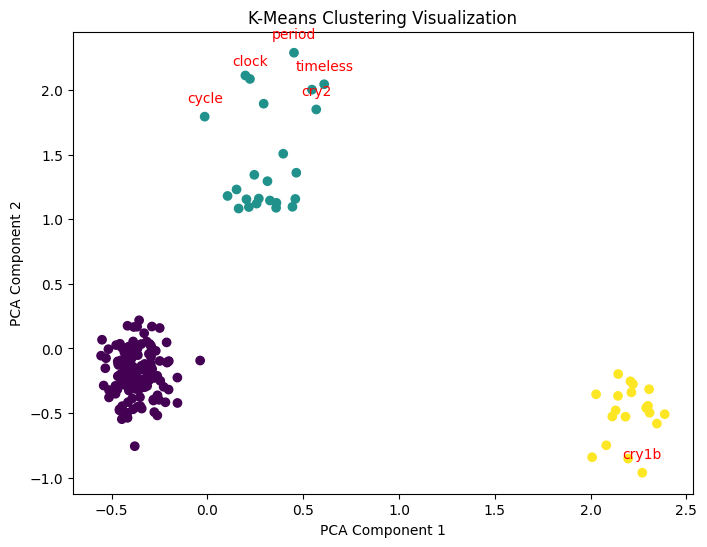

In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)  # Change number of clusters as needed
kmeans.fit(filtered_df)

# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(filtered_df)

# Create a new DataFrame with PCA results and cluster labels
filtered_df['PCA1'] = pca_result[:, 0]
filtered_df['PCA2'] = pca_result[:, 1]
filtered_df['Cluster'] = kmeans.labels_
# print(filtered_df)
# Plot the clusters
# row_index = 2
highlight = filtered_df.loc[filtered_df.index.isin(candidate_gene)]
print(highlight)
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['PCA1'], filtered_df['PCA2'], c=filtered_df['Cluster'], cmap='viridis')
for gene_name in candidate_gene:
    if gene_name in highlight.index:
        plt.annotate(f"{gene_name}", (highlight.loc[gene_name,'PCA1'], highlight.loc[gene_name,'PCA2']), textcoords="offset points", xytext=(0,10), ha='center', color='red')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
# plt.colorbar(label='Cluster')
plt.show()

In [28]:
df = filtered_df
df['Cluster'] = kmeans.labels_

# Create custom labels for each point based on the column names and cluster
df['Cluster_Label'] = df.apply(lambda row: f"Cluster {row['Cluster']} - " + 
                               ', '.join([f"{col}: {row[col]}" for col in df.columns if col != 'Cluster' and col != 'Cluster_Label']),
                               axis=1)

print("DataFrame with Custom Labels:")
print(df[['Cluster', 'Cluster_Label']])

DataFrame with Custom Labels:
             Cluster                                      Cluster_Label
12450at7088        0  Cluster 0.0 - period: 0.0247867055705969, time...
cry2               1  Cluster 1.0 - period: 0.47112386471213, timele...
1557at7088         0  Cluster 0.0 - period: 0.058006379970918, timel...
3356at7088         0  Cluster 0.0 - period: 0.0179611440870963, time...
1422at7088         1  Cluster 1.0 - period: 0.579631676708309, timel...
...              ...                                                ...
5488at7088         0  Cluster 0.0 - period: 0.0581972392859406, time...
1258at7088         0  Cluster 0.0 - period: 0.0389486203258177, time...
7508at7088         0  Cluster 0.0 - period: 0.150160560034603, timel...
5219at7088         0  Cluster 0.0 - period: 0.0793631244683918, time...
1644at7088         0  Cluster 0.0 - period: 0.0777817001641663, time...

[174 rows x 2 columns]


In [68]:
filtered_df.to_csv(f"{location}/ERC_clock_cluster_3.csv")
